In [42]:
import re
import pandas as pd
%pip install emoji
import emoji

# Load chat data
with open("WhatsApp Chat with Ankita EP 21.txt", 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

print(len(chat_data))
print(chat_data[21])

Note: you may need to restart the kernel to use updated packages.
3150
9/27/22, 5:03 PM - Ankita EP 21: Tm ja rahe ho??inter iit




[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Define regular expressions to match different types of messages
pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+):\s(.+)$')
link_pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+?):\s?(https?://\S+)')
image_pattern = re.compile(r'\<Media omitted\>')
group_notification_pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+?)(?::\s)?(.+)?$')

# Parse chat data into different categories
messages = []
links = []
links2 = []
images = []
senders = []
date_times = []
message_type = []

for line in chat_data:
    if pattern.match(line):
        message = pattern.match(line).groups()
        if "<Media omitted>" in message:
            message_type.append("image")
        elif "This message was deleted" in line:
            message_type.append("notification")
        elif "Missed voice call" in line:
            message_type.append("notification")
        else:
            message_type.append("text")
        date_times.append(message[0])
        senders.append(message[1])
        messages.append(message[2])
    elif group_notification_pattern.match(line):
        message = group_notification_pattern.match(line).groups()
        date_times.append(message[0])
        senders.append('group notificaton')
        messages.append(message[1] + message[2])
        message_type.append('notification')
    if link_pattern.search(line):
        link = link_pattern.search(line).groups()
        date_times.append(link[0])
        senders.append(link[1])
        links.append(link[2])
        messages.append(link[2])
        message_type.append("link")
    if image_pattern.search(line):
        images.append(image_pattern.search(line).group())



# Print the total number of messages, links, and images
print(f'Total Messages: {len(messages)}')
print(f'Total Links: {len(links)}')
print(f'Total Images: {len(images)}')
print(len(message_type))

Total Messages: 3143
Total Links: 7
Total Images: 223
3143


In [44]:
chat_df = pd.DataFrame({'message_date': date_times ,'senders': senders, 'message':messages, 'message_type':message_type})
chat_df[chat_df["message_type"] == "notification"]

,message_date,senders,message,message_type
0,"9/26/22, 8:29 PM",group notificaton,Messages and calls are end-to-end encrypted. N...,notification
2017,"2/4/23, 8:17 PM",Ankita EP 21,Missed voice call,notification
2330,"3/1/23, 5:27 PM",Ankita EP 21,This message was deleted,notification
2331,"3/1/23, 5:27 PM",Ankita EP 21,This message was deleted,notification
2720,"3/21/23, 7:54 AM",Ankita EP 21,Missed voice call,notification
2801,"3/27/23, 6:57 PM",Ankita EP 21,Missed voice call,notification
2931,"4/4/23, 5:46 PM",Ankita EP 21,Missed voice call,notification
2932,"4/4/23, 5:47 PM",Ankita EP 21,Missed voice call,notification
2934,"4/4/23, 6:12 PM",Ankita EP 21,Missed voice call,notification
3138,"4/13/23, 8:59 PM",Ankita EP 21,Missed voice call,notification


In [45]:
# Convert message_date datatype to "datetime" datatype
chat_df["message_date"] = pd.to_datetime(chat_df["message_date"])
chat_df.rename(columns={'message_date':'date'}, inplace=True)
chat_df

,date,senders,message,message_type
0,2022-09-26 20:29:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification
1,2022-09-26 20:29:00,Donal,"Hi Ankita, Donal here!",text
2,2022-09-26 21:07:00,Ankita EP 21,Firstly when is inter iit exactly??😂,text
3,2022-09-26 21:07:00,Ankita EP 21,1dec to 15??,text
4,2022-09-26 21:08:00,Ankita EP 21,If this is the case then I'll go home,text
...,...,...,...,...
3138,2023-04-13 20:59:00,Ankita EP 21,Missed voice call,notification
3139,2023-04-13 21:15:00,Donal,Aree,text
3140,2023-04-13 21:15:00,Donal,Sorry,text
3141,2023-04-13 23:20:00,Ankita EP 21,<Media omitted>,image


In [46]:
chat_df['year'] = chat_df['date'].dt.year
chat_df['month'] = chat_df['date'].dt.month_name()
chat_df['day'] = chat_df['date'].dt.day
chat_df['hour'] = chat_df['date'].dt.hour
chat_df['minute'] = chat_df['date'].dt.minute
chat_df

,date,senders,message,message_type,year,month,day,hour,minute
0,2022-09-26 20:29:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,September,26,20,29
1,2022-09-26 20:29:00,Donal,"Hi Ankita, Donal here!",text,2022,September,26,20,29
2,2022-09-26 21:07:00,Ankita EP 21,Firstly when is inter iit exactly??😂,text,2022,September,26,21,7
3,2022-09-26 21:07:00,Ankita EP 21,1dec to 15??,text,2022,September,26,21,7
4,2022-09-26 21:08:00,Ankita EP 21,If this is the case then I'll go home,text,2022,September,26,21,8
...,...,...,...,...,...,...,...,...,...
3138,2023-04-13 20:59:00,Ankita EP 21,Missed voice call,notification,2023,April,13,20,59
3139,2023-04-13 21:15:00,Donal,Aree,text,2023,April,13,21,15
3140,2023-04-13 21:15:00,Donal,Sorry,text,2023,April,13,21,15
3141,2023-04-13 23:20:00,Ankita EP 21,<Media omitted>,image,2023,April,13,23,20


In [47]:
num_messages = len(chat_df)
num_media = len(chat_df[chat_df["message_type"] == "image"])
num_links = len(chat_df[chat_df["message_type"] == "link"])
# num_messages
num_media

223

In [48]:
words = []
for message in chat_df['message']:
    words.extend(message.split())
    
print(len(words))
print(type(words))
print(words[0])

12950
<class 'list'>
Messages


In [49]:
## Busiest user ###
# Messages sent by each user
messages_by_user = chat_df['senders'].value_counts()
# Most active user
# most_active_user = max(messages_by_user, key=messages_by_user.get)
top5 = messages_by_user.head()

In [50]:
top5

Donal                1750
Ankita EP 21         1392
group notificaton       1
Name: senders, dtype: int64

Text(0, 0.5, 'User ->')

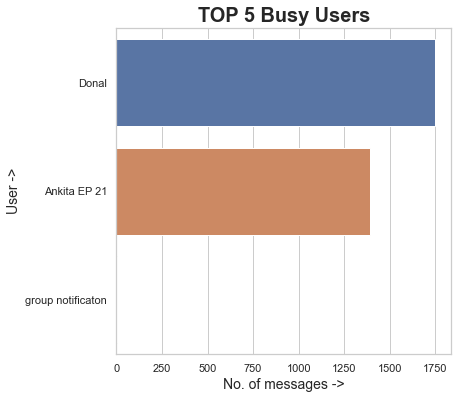

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

sns.set_theme(style="whitegrid")
font_prop = font_manager.FontProperties(size=14)

f, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x=top5.values, y=top5.index).set_title("TOP 5 Busy Users", fontdict={'size':20, 'weight':'bold'})
plt.rc('axes', labelsize=30)    
plt.xlabel("No. of messages ->", fontproperties=font_prop)
plt.ylabel("User ->", fontproperties=font_prop)


In [52]:
percent_messages_by_user = 100*(messages_by_user)/chat_df.shape[0]
p = round(percent_messages_by_user, 2)
p_D = pd.DataFrame({'email':p.index, 'list':p.values})
p_D

,email,list
0,Donal,55.68
1,Ankita EP 21,44.29
2,group notificaton,0.03


<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


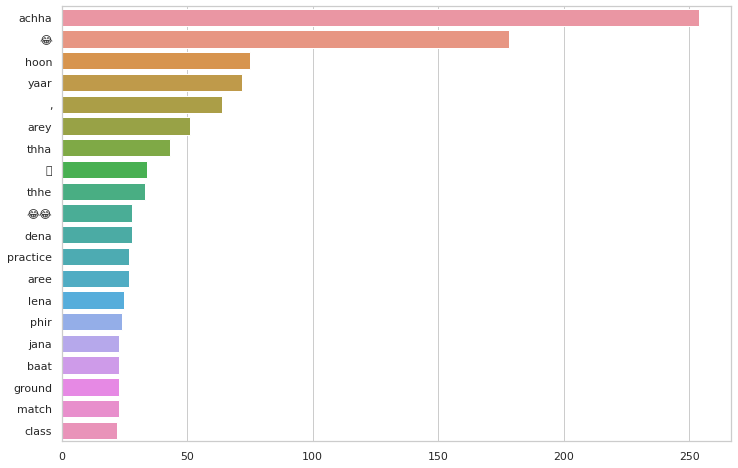

In [53]:
## Most used words in the group
# remove group notifications
# remove media ommited messages
# remove stopwords
import itertools

temp_df = chat_df[chat_df['message_type'] == "text"]
f = open('hinglish_stopwords.txt', 'r')
stop_words = f.read()
stop_words += "message"

words = []
for message in temp_df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            if '@' not in word:
                words.append(word)


freq = {}
for word in words:
    if word in freq:
        freq[word] += 1
    else:
        freq[word] = 1

topwords = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
top20 = dict(itertools.islice(topwords.items(), 20))
top20
# Create dataframe from first 20 entries of the dictionary
topwords_df = pd.DataFrame.from_dict(top20, orient='index')
topwords_df.columns=['freq']   
topwords_df
print(type(topwords_df))

plt.rcParams['font.sans-serif'] = ['Noto Color Emoji']
sns.barplot(x=topwords_df.values.flatten(), y=topwords_df.index)
# topwords_df.index
# topwords_df.values.flatten()


In [54]:
group_notification_pattern = re.compile(r'^(\d+/\d+/\d+, \d+:\d+\s*[A|P]M)\s-\s(.+?)(?::\s)?(.+)?$')
line = "10/3/22, 8:09 AM : This message was deleted"

if group_notification_pattern.match(line):
    message = group_notification_pattern.match(line).groups()
    date_times.append(message[0])
    senders.append('group notificaton')
    messages.append(message[1] + message[2])
    message_type.append('notification')

message

'Sorry'

In [55]:
# import matplotlib.font_manager as fm

# # download 'Noto Color Emoji' font
# !wget "https://github.com/googlefonts/noto-emoji/raw/main/fonts/NotoColorEmoji.ttf"

# # install 'Noto Color Emoji' font
# fm.fontManager.addfont('NotoColorEmoji.ttf')

# # check if 'Noto Color Emoji' is now available
# if 'Noto Color Emoji' not in [f.name for f in fm.fontManager.ttflist()]:
#     print("'Noto Color Emoji' could not be installed.")
# else:
#     print("'Noto Color Emoji' has been successfully installed.")


In [56]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)


chat_df['emojis'] = chat_df['message'].apply(extract_emojis)

In [57]:
emoji_series = chat_df['emojis'].value_counts()
emoji_series


       2572
😂       208
😂😂       50
🥲        45
🥹        14
       ... 
🥳✨        1
😂😂😎       1
😎🤣        1
🙏         1
🤯         1
Name: emojis, Length: 109, dtype: int64

In [58]:
emoji_df = pd.DataFrame({'emoji':emoji_series.index, 'count':emoji_series.values})
emoji_df.drop(index=0)


,emoji,count
1,😂,208
2,😂😂,50
3,🥲,45
4,🥹,14
5,😭,13
...,...,...
104,🥳✨,1
105,😂😂😎,1
106,😎🤣,1
107,🙏,1


findfont: Font family ['Noto Color Emoji'] not found. Falling back to DejaVu Sans.
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129401 (\U0001f979) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


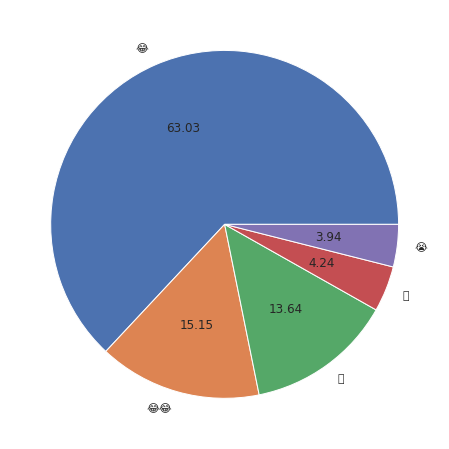

In [59]:
import numpy as np
# y = np.array([35, 25, 25, 15])
# mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
font_path = font_manager.findfont(font_manager.FontProperties(family=['Noto Color Emoji']))
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
y = emoji_df.drop(index=0).head()['count'].values
mylabels = emoji_df.drop(index=0).head()['emoji'].values


plt.pie(y, labels = mylabels, autopct='%0.2f')
plt.show() 


In [60]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager

# # Specify the font family to use for the plot
# font_path = font_manager.findfont(font_manager.FontProperties(family=['Noto Color Emoji']))
# plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()
# # plt.rcParams['font.family'] = 'Apple Color Emoji'
# # Define the data for the bar plot
# x = ['🍎', '🍊', '🍌', '🍇', '🍉']
# y = [10, 8, 6, 4, 2]

# # Create the bar plot
# fig, ax = plt.subplots()
# ax.bar(x, y)

# # Add labels to the plot
# ax.set_xlabel('Fruit')
# ax.set_ylabel('Quantity')
# ax.set_title('Top 5 Fruits')

# # Show the plot
# plt.show()


In [61]:
# Time analysis
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis
0,2022-09-26 20:29:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,September,26,20,29,
1,2022-09-26 20:29:00,Donal,"Hi Ankita, Donal here!",text,2022,September,26,20,29,
2,2022-09-26 21:07:00,Ankita EP 21,Firstly when is inter iit exactly??😂,text,2022,September,26,21,7,😂
3,2022-09-26 21:07:00,Ankita EP 21,1dec to 15??,text,2022,September,26,21,7,
4,2022-09-26 21:08:00,Ankita EP 21,If this is the case then I'll go home,text,2022,September,26,21,8,
...,...,...,...,...,...,...,...,...,...,...
3138,2023-04-13 20:59:00,Ankita EP 21,Missed voice call,notification,2023,April,13,20,59,
3139,2023-04-13 21:15:00,Donal,Aree,text,2023,April,13,21,15,
3140,2023-04-13 21:15:00,Donal,Sorry,text,2023,April,13,21,15,
3141,2023-04-13 23:20:00,Ankita EP 21,<Media omitted>,image,2023,April,13,23,20,


In [62]:
# Change dataframe according to selected users
# LINEPLOT : Year Month VS # messages
chat_df['year_month'] = chat_df.apply(lambda row: str(row.year) + '_' + row.month[:3], axis=1)
chat_series = chat_df.groupby(['year_month'])['message'].count()
chat_series


year_month
2022_Dec    856
2022_Nov    242
2022_Oct     54
2022_Sep     39
2023_Apr    318
2023_Feb    402
2023_Jan    711
2023_Mar    521
Name: message, dtype: int64

In [63]:
temp_df = chat_series.to_frame()
temp_df

,message
year_month,
2022_Dec,856
2022_Nov,242
2022_Oct,54
2022_Sep,39
2023_Apr,318
2023_Feb,402
2023_Jan,711
2023_Mar,521


In [64]:
# temp_df.reset_index(level=, drop=True)

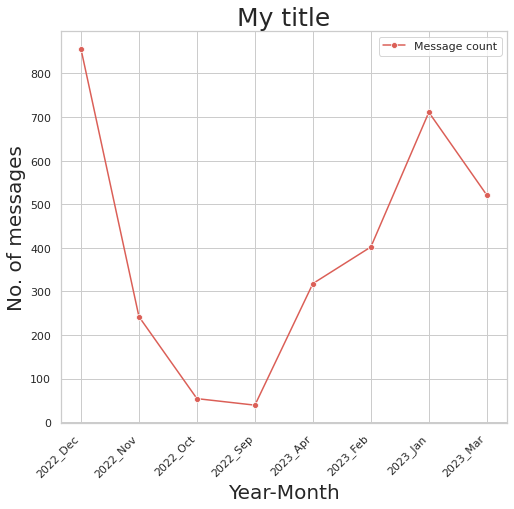

In [65]:
f, ax = plt.subplots(figsize=(8, 8))
sns.set_palette("hls", 8)
sns.lineplot(temp_df, markers=True)
f.autofmt_xdate(rotation=45)
ax.set_xlabel("Year-Month", size = 20)
ax.set_ylabel("No. of messages", size = 20)
ax.set_title('My title', size = 25)
ax.legend(["Message count"])


In [66]:
# chat_df


In [67]:
chat_df.drop('year_month', inplace=True, axis=1)

In [68]:
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis
0,2022-09-26 20:29:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,September,26,20,29,
1,2022-09-26 20:29:00,Donal,"Hi Ankita, Donal here!",text,2022,September,26,20,29,
2,2022-09-26 21:07:00,Ankita EP 21,Firstly when is inter iit exactly??😂,text,2022,September,26,21,7,😂
3,2022-09-26 21:07:00,Ankita EP 21,1dec to 15??,text,2022,September,26,21,7,
4,2022-09-26 21:08:00,Ankita EP 21,If this is the case then I'll go home,text,2022,September,26,21,8,
...,...,...,...,...,...,...,...,...,...,...
3138,2023-04-13 20:59:00,Ankita EP 21,Missed voice call,notification,2023,April,13,20,59,
3139,2023-04-13 21:15:00,Donal,Aree,text,2023,April,13,21,15,
3140,2023-04-13 21:15:00,Donal,Sorry,text,2023,April,13,21,15,
3141,2023-04-13 23:20:00,Ankita EP 21,<Media omitted>,image,2023,April,13,23,20,


In [69]:
chat_df['only_date'] = chat_df['date'].dt.date

In [70]:
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis,only_date
0,2022-09-26 20:29:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,September,26,20,29,,2022-09-26
1,2022-09-26 20:29:00,Donal,"Hi Ankita, Donal here!",text,2022,September,26,20,29,,2022-09-26
2,2022-09-26 21:07:00,Ankita EP 21,Firstly when is inter iit exactly??😂,text,2022,September,26,21,7,😂,2022-09-26
3,2022-09-26 21:07:00,Ankita EP 21,1dec to 15??,text,2022,September,26,21,7,,2022-09-26
4,2022-09-26 21:08:00,Ankita EP 21,If this is the case then I'll go home,text,2022,September,26,21,8,,2022-09-26
...,...,...,...,...,...,...,...,...,...,...,...
3138,2023-04-13 20:59:00,Ankita EP 21,Missed voice call,notification,2023,April,13,20,59,,2023-04-13
3139,2023-04-13 21:15:00,Donal,Aree,text,2023,April,13,21,15,,2023-04-13
3140,2023-04-13 21:15:00,Donal,Sorry,text,2023,April,13,21,15,,2023-04-13
3141,2023-04-13 23:20:00,Ankita EP 21,<Media omitted>,image,2023,April,13,23,20,,2023-04-13


In [71]:
chat_df['day_name'] = chat_df['date'].dt.day_name()
ws = chat_df['day_name'].value_counts()

In [72]:
ws.to_frame()

,day_name
Tuesday,533
Sunday,499
Monday,440
Saturday,433
Wednesday,428
Thursday,424
Friday,386


In [73]:
# Create a pivot table to count the number of messages sent by each member on each day and hour
pivot = pd.pivot_table(chat_df, index='day_name', columns='hour', values='message', aggfunc='count')

In [74]:
pivot

hour,0,1,2,3,4,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,23.0,1.0,NaN,NaN,NaN,6.0,NaN,3.0,10.0,20.0,...,17.0,18.0,7.0,23.0,25.0,19.0,46.0,70.0,50.0,17.0
Monday,16.0,35.0,NaN,NaN,NaN,3.0,NaN,1.0,6.0,8.0,...,46.0,6.0,5.0,31.0,25.0,15.0,39.0,46.0,26.0,18.0
Saturday,18.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,23.0,1.0,...,66.0,15.0,1.0,18.0,15.0,11.0,21.0,130.0,27.0,28.0
Sunday,16.0,5.0,NaN,2.0,NaN,1.0,1.0,20.0,2.0,1.0,...,12.0,36.0,6.0,9.0,12.0,2.0,88.0,29.0,138.0,30.0
Thursday,14.0,1.0,NaN,NaN,NaN,1.0,1.0,8.0,10.0,1.0,...,42.0,2.0,13.0,37.0,58.0,13.0,41.0,56.0,13.0,28.0
Tuesday,32.0,5.0,1.0,NaN,1.0,1.0,22.0,3.0,8.0,7.0,...,35.0,14.0,36.0,45.0,12.0,51.0,41.0,53.0,60.0,49.0
Wednesday,45.0,1.0,NaN,NaN,NaN,NaN,1.0,5.0,13.0,18.0,...,7.0,5.0,6.0,38.0,62.0,26.0,23.0,40.0,30.0,2.0


<AxesSubplot:xlabel='hour', ylabel='day_name'>

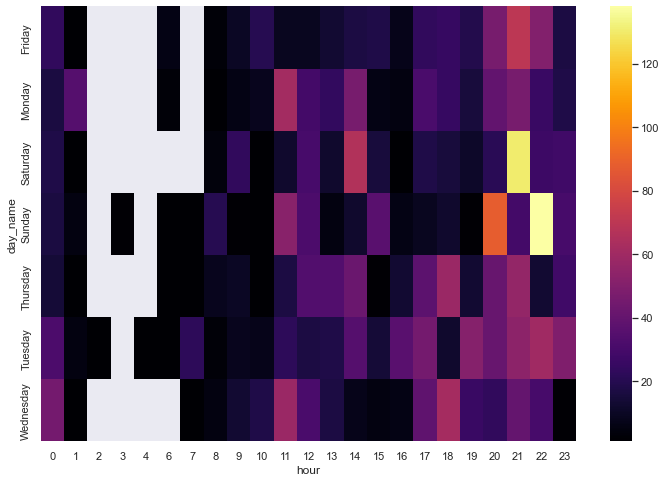

In [75]:
# Create a heatmap to visualize the pivot table
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pivot, cmap='inferno', fmt='.0f')

<AxesSubplot:xlabel='hour', ylabel='day_name'>

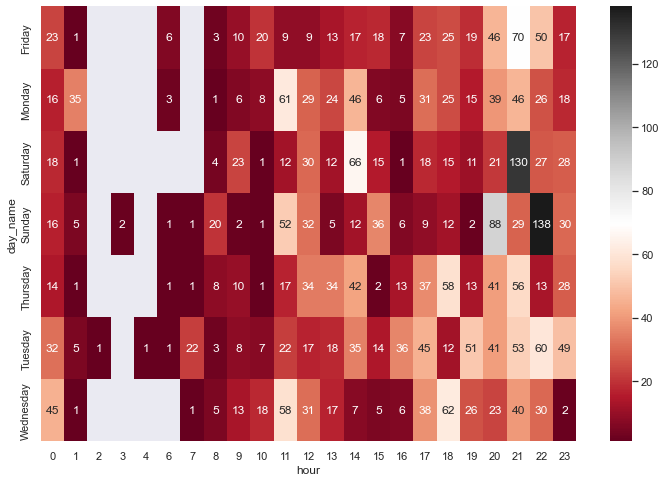

In [76]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pivot, cmap='RdGy', annot=True, fmt='.0f')

In [77]:
chat_df['period'] = chat_df.apply(lambda row: str(row.hour) + '-' + str(row.hour + 1) , axis=1)

In [78]:
chat_df

,date,senders,message,message_type,year,month,day,hour,minute,emojis,only_date,day_name,period
0,2022-09-26 20:29:00,group notificaton,Messages and calls are end-to-end encrypted. N...,notification,2022,September,26,20,29,,2022-09-26,Monday,20-21
1,2022-09-26 20:29:00,Donal,"Hi Ankita, Donal here!",text,2022,September,26,20,29,,2022-09-26,Monday,20-21
2,2022-09-26 21:07:00,Ankita EP 21,Firstly when is inter iit exactly??😂,text,2022,September,26,21,7,😂,2022-09-26,Monday,21-22
3,2022-09-26 21:07:00,Ankita EP 21,1dec to 15??,text,2022,September,26,21,7,,2022-09-26,Monday,21-22
4,2022-09-26 21:08:00,Ankita EP 21,If this is the case then I'll go home,text,2022,September,26,21,8,,2022-09-26,Monday,21-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,2023-04-13 20:59:00,Ankita EP 21,Missed voice call,notification,2023,April,13,20,59,,2023-04-13,Thursday,20-21
3139,2023-04-13 21:15:00,Donal,Aree,text,2023,April,13,21,15,,2023-04-13,Thursday,21-22
3140,2023-04-13 21:15:00,Donal,Sorry,text,2023,April,13,21,15,,2023-04-13,Thursday,21-22
3141,2023-04-13 23:20:00,Ankita EP 21,<Media omitted>,image,2023,April,13,23,20,,2023-04-13,Thursday,23-24


In [79]:
pivot = pd.pivot_table(chat_df, index='day_name', columns='period', values='message', aggfunc='count').fillna(0)


In [80]:
pivot

period,0-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-24,3-4,4-5,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,23.0,1.0,20.0,9.0,9.0,13.0,17.0,18.0,7.0,23.0,...,46.0,70.0,50.0,17.0,0.0,0.0,6.0,0.0,3.0,10.0
Monday,16.0,35.0,8.0,61.0,29.0,24.0,46.0,6.0,5.0,31.0,...,39.0,46.0,26.0,18.0,0.0,0.0,3.0,0.0,1.0,6.0
Saturday,18.0,1.0,1.0,12.0,30.0,12.0,66.0,15.0,1.0,18.0,...,21.0,130.0,27.0,28.0,0.0,0.0,0.0,0.0,4.0,23.0
Sunday,16.0,5.0,1.0,52.0,32.0,5.0,12.0,36.0,6.0,9.0,...,88.0,29.0,138.0,30.0,2.0,0.0,1.0,1.0,20.0,2.0
Thursday,14.0,1.0,1.0,17.0,34.0,34.0,42.0,2.0,13.0,37.0,...,41.0,56.0,13.0,28.0,0.0,0.0,1.0,1.0,8.0,10.0
Tuesday,32.0,5.0,7.0,22.0,17.0,18.0,35.0,14.0,36.0,45.0,...,41.0,53.0,60.0,49.0,0.0,1.0,1.0,22.0,3.0,8.0
Wednesday,45.0,1.0,18.0,58.0,31.0,17.0,7.0,5.0,6.0,38.0,...,23.0,40.0,30.0,2.0,0.0,0.0,0.0,1.0,5.0,13.0


In [81]:
column_order = sorted(pivot.columns, key=lambda x: int(x.split('-')[0]))

In [82]:
pivot = pivot[column_order]
pivot

period,0-1,1-2,2-3,3-4,4-5,6-7,7-8,8-9,9-10,10-11,...,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,23.0,1.0,0.0,0.0,0.0,6.0,0.0,3.0,10.0,20.0,...,17.0,18.0,7.0,23.0,25.0,19.0,46.0,70.0,50.0,17.0
Monday,16.0,35.0,0.0,0.0,0.0,3.0,0.0,1.0,6.0,8.0,...,46.0,6.0,5.0,31.0,25.0,15.0,39.0,46.0,26.0,18.0
Saturday,18.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,23.0,1.0,...,66.0,15.0,1.0,18.0,15.0,11.0,21.0,130.0,27.0,28.0
Sunday,16.0,5.0,0.0,2.0,0.0,1.0,1.0,20.0,2.0,1.0,...,12.0,36.0,6.0,9.0,12.0,2.0,88.0,29.0,138.0,30.0
Thursday,14.0,1.0,0.0,0.0,0.0,1.0,1.0,8.0,10.0,1.0,...,42.0,2.0,13.0,37.0,58.0,13.0,41.0,56.0,13.0,28.0
Tuesday,32.0,5.0,1.0,0.0,1.0,1.0,22.0,3.0,8.0,7.0,...,35.0,14.0,36.0,45.0,12.0,51.0,41.0,53.0,60.0,49.0
Wednesday,45.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,13.0,18.0,...,7.0,5.0,6.0,38.0,62.0,26.0,23.0,40.0,30.0,2.0


In [ ]:
# Say I have two unique values in the sender column i want to create a new column based on the sender i.e if sender is A , then reciever is B and vice versa

df = chat_df
# df['reciever'] = 


# group the DataFrame by sender
sender_grouped = df.groupby('senders')

# create a new DataFrame to store the average response times
response_times = pd.DataFrame(columns=['senders', 'receiver', 'Average Response Time'])

# iterate through each sender
for sender, group in sender_grouped:
    # iterate through each receiver
    for receiver in group['Receiver'].unique():
        # filter the DataFrame to only contain messages between the sender and receiver
        filtered_df = group[group['Receiver'] == receiver].sort_values(by='Date')
        # calculate the time difference between each message
        time_diffs = filtered_df['Date'].diff().iloc[1:]
        # calculate the average response time
        avg_response_time = time_diffs.mean()
        # add the results to the response_times DataFrame
        response_times = response_times.append({'Sender': sender, 'Receiver': receiver, 'Average Response Time': avg_response_time}, ignore_index=True)

# display the results
print(response_times)